In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, auc, roc_auc_score
from sklearn import preprocessing
from sklearn import utils



In [8]:
train=pd.read_csv("/Users/girishelangovan/Documents/inceptez_batch_16/Dataset/employee_attrition/Dataset/Train.csv")
test=pd.read_csv("/Users/girishelangovan/Documents/inceptez_batch_16/Dataset/employee_attrition/Dataset/Test.csv")

In [9]:
test

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,EID_22547,F,32.0,3,Single,Franklin,Sales,Directive,3.0,3,...,6.0,type2,2.0,1,-0.1048,0.7075,1.0,4,7,4
2996,EID_10066,F,NaN,2,Single,Franklin,Marketing,Conceptual,10.0,2,...,9.0,type2,1.0,3,0.7516,0.7075,3.0,4,8,3
2997,EID_7126,F,60.0,4,Single,Lebanon,Logistics,Analytical,35.0,1,...,9.0,type3,3.0,3,-1.8176,-0.4537,NaN,4,8,4
2998,EID_4929,F,51.0,1,Married,Springfield,IT,Behavioral,23.0,1,...,6.0,type3,1.0,5,0.7516,-0.4537,2.0,3,9,2


In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6588.0,39.622799,13.606920,19.0000,27.0000,37.00000,52.0000,65.0000
Education_Level,7000.0,3.187857,1.065102,1.0000,3.0000,3.00000,4.0000,5.0000
Time_of_service,6856.0,13.385064,10.364188,0.0000,5.0000,10.00000,21.0000,43.0000
Time_since_promotion,7000.0,2.367143,1.149395,0.0000,1.0000,2.00000,3.0000,4.0000
growth_rate,7000.0,47.064286,15.761406,20.0000,33.0000,47.00000,61.0000,74.0000
Travel_Rate,7000.0,0.817857,0.648205,0.0000,0.0000,1.00000,1.0000,2.0000
Post_Level,7000.0,2.798000,1.163721,1.0000,2.0000,3.00000,3.0000,5.0000
Pay_Scale,6991.0,6.006294,2.058435,1.0000,5.0000,6.00000,8.0000,10.0000
Work_Life_balance,6989.0,2.387895,1.122786,1.0000,1.0000,2.00000,3.0000,5.0000
VAR1,7000.0,3.098571,0.836377,1.0000,3.0000,3.00000,3.0000,5.0000


In [11]:
train.shape,test.shape

((7000, 24), (3000, 23))

In [12]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [13]:
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [14]:
train.Attrition_rate.isna().sum()

0

In [15]:
data = pd.concat([train,test])

In [16]:
data

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,EID_22547,F,32.0,3,Single,Franklin,Sales,Directive,3.0,3,...,type2,2.0,1,-0.1048,0.7075,1.0,4,7,4,NaN
2996,EID_10066,F,NaN,2,Single,Franklin,Marketing,Conceptual,10.0,2,...,type2,1.0,3,0.7516,0.7075,3.0,4,8,3,NaN
2997,EID_7126,F,60.0,4,Single,Lebanon,Logistics,Analytical,35.0,1,...,type3,3.0,3,-1.8176,-0.4537,NaN,4,8,4,NaN
2998,EID_4929,F,51.0,1,Married,Springfield,IT,Behavioral,23.0,1,...,type3,1.0,5,0.7516,-0.4537,2.0,3,9,2,NaN


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9427.0,39.675507,13.574856,19.0000,27.0000,38.00000,52.0000,65.0000
Education_Level,10000.0,3.199400,1.065436,1.0000,3.0000,3.00000,4.0000,5.0000
Time_of_service,9804.0,13.390657,10.311381,0.0000,5.0000,10.00000,21.0000,43.0000
Time_since_promotion,10000.0,2.378600,1.149780,0.0000,1.0000,2.00000,3.0000,4.0000
growth_rate,10000.0,47.008400,15.848553,20.0000,33.0000,47.00000,61.0000,74.0000
Travel_Rate,10000.0,0.820700,0.646524,0.0000,0.0000,1.00000,1.0000,2.0000
Post_Level,10000.0,2.797000,1.171037,1.0000,2.0000,3.00000,4.0000,5.0000
Pay_Scale,9988.0,6.022627,2.070087,1.0000,5.0000,6.00000,8.0000,10.0000
Work_Life_balance,9984.0,2.385817,1.128782,1.0000,1.0000,2.00000,3.0000,5.0000
VAR1,10000.0,3.089100,0.831884,1.0000,3.0000,3.00000,3.0000,5.0000


In [18]:
data["Age"].isna().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996     True
2997    False
2998    False
2999    False
Name: Age, Length: 10000, dtype: bool>

In [19]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                           573
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service               196
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                      12
Compensation_and_Benefits       0
Work_Life_balance              16
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [20]:
data.duplicated().sum()

0

In [21]:
data["Age"].value_counts()

22.0    347
27.0    336
25.0    320
26.0    305
54.0    304
37.0    302
60.0    300
52.0    299
35.0    288
30.0    286
31.0    283
42.0    277
28.0    277
45.0    274
47.0    270
32.0    270
24.0    264
21.0    242
65.0    213
19.0    213
23.0    208
59.0    194
20.0    176
58.0    170
50.0    156
29.0    154
33.0    145
51.0    142
41.0    141
34.0    140
56.0    140
36.0    138
43.0    137
49.0    137
57.0    136
38.0    135
55.0    135
53.0    133
46.0    132
64.0    125
44.0    123
40.0    123
48.0    122
39.0    120
63.0    103
62.0    101
61.0     91
Name: Age, dtype: int64

In [22]:
data["Time_of_service"].value_counts()

6.0     755
5.0     700
3.0     687
4.0     653
2.0     415
8.0     385
7.0     376
10.0    327
12.0    290
9.0     280
13.0    275
11.0    258
14.0    244
15.0    242
16.0    231
0.0     222
18.0    220
20.0    209
21.0    208
22.0    191
19.0    183
23.0    182
1.0     181
17.0    180
24.0    169
26.0    165
25.0    165
27.0    159
28.0    156
30.0    147
29.0    122
31.0    118
32.0    106
33.0    102
34.0     93
35.0     79
36.0     79
37.0     70
38.0     58
39.0     36
40.0     32
41.0     24
42.0     21
43.0      9
Name: Time_of_service, dtype: int64

In [23]:
data["VAR2"].value_counts()

 0.7516    3582
-0.1048    2288
-0.9612    1469
-1.8176    1173
 1.6081     694
Name: VAR2, dtype: int64

In [24]:
data["Work_Life_balance"].value_counts()

1.0    2951
3.0    2858
2.0    2287
4.0    1719
5.0     169
Name: Work_Life_balance, dtype: int64

In [25]:
data["Pay_Scale"].value_counts()

8.0     1964
6.0     1820
5.0     1640
4.0     1405
7.0     1163
9.0      703
2.0      383
3.0      366
10.0     314
1.0      230
Name: Pay_Scale, dtype: int64

In [26]:
data.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [27]:
data["Post_Level"].value_counts()

3    3469
2    2514
1    1516
4    1486
5    1015
Name: Post_Level, dtype: int64

In [28]:
data[data["Pay_Scale"].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
445,EID_4641,M,52.0,3,Married,Clinton,Logistics,Behavioral,15.0,2,...,type3,1.0,3,0.7516,-0.4537,3.0,1,7,1,0.1803
1126,EID_16660,M,28.0,3,Married,Lebanon,Logistics,Directive,5.0,1,...,type2,3.0,1,0.7516,-1.6150,1.0,3,8,3,0.1154
1378,EID_19310,F,21.0,4,Single,Franklin,Sales,Directive,2.0,2,...,type2,NaN,2,NaN,-0.4537,2.0,3,7,4,0.0617
1997,EID_24076,M,35.0,3,Married,Springfield,Logistics,Directive,12.0,1,...,type2,3.0,3,-1.8176,0.7075,2.0,2,7,4,0.1047
3083,EID_16076,M,23.0,5,Married,Lebanon,Operarions,Analytical,4.0,1,...,type3,3.0,3,-0.9612,0.7075,2.0,3,8,4,0.1841
3777,EID_13589,M,36.0,4,Married,Franklin,IT,Directive,9.0,1,...,type2,3.0,3,0.7516,-1.6150,2.0,4,7,3,0.8597
4508,EID_11400,M,33.0,3,Married,Washington,Operarions,Directive,5.0,1,...,type2,2.0,2,-0.1048,-0.4537,1.0,3,8,5,0.0838
5958,EID_6740,F,52.0,3,Married,Clinton,Logistics,Conceptual,16.0,2,...,type3,4.0,3,0.7516,1.8688,2.0,2,8,2,0.1900
6857,EID_24697,M,47.0,1,Single,Franklin,Sales,Directive,23.0,1,...,type2,1.0,3,-0.1048,0.7075,2.0,2,8,3,0.1509
1202,EID_17521,M,24.0,2,Married,Lebanon,Purchasing,Conceptual,5.0,2,...,type3,3.0,3,-0.9612,-0.4537,2.0,4,6,3,NaN


In [29]:
data.groupby("Gender").Age.mean()

Gender
F    39.694007
M    39.649334
Name: Age, dtype: float64

In [30]:
data.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [31]:
data[data["Post_Level"].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate


In [32]:
#data["Item_Weight"] = data.groupby("Item_Identifier").Item_Weight.transform(lambda x: x.fillna(x.mean()))

In [33]:
data["Post_Level"].value_counts()

3    3469
2    2514
1    1516
4    1486
5    1015
Name: Post_Level, dtype: int64

In [34]:
data.groupby("Gender").Age.mean()

Gender
F    39.694007
M    39.649334
Name: Age, dtype: float64

In [35]:
data.groupby("Gender").Age.median() 

Gender
F    38.0
M    37.5
Name: Age, dtype: float64

In [36]:
data["Age"] = data.groupby("Gender").Age.transform(lambda x: x.fillna(x.mean()))

In [37]:
data[data["Age"].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate


In [38]:
data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [39]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service               196
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                      12
Compensation_and_Benefits       0
Work_Life_balance              16
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [108]:
data[data["Pay_Scale"].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate


In [109]:
data.groupby("Age").Time_of_service.mean() 

Age
19.000000     0.000000
20.000000     1.000000
21.000000     2.000000
22.000000     3.000000
23.000000     4.000000
24.000000     5.000000
25.000000     6.000000
26.000000     2.940199
27.000000     4.093939
28.000000     5.014925
29.000000     5.926667
30.000000     7.010638
31.000000     5.177936
32.000000     6.405303
33.000000     7.732394
34.000000     8.854015
35.000000     9.489362
36.000000    10.595588
37.000000    11.397306
38.000000    12.416667
39.000000    13.483051
39.649334    12.634538
39.694007    13.752381
40.000000    14.347458
41.000000    10.467153
42.000000    12.000000
43.000000    12.051471
44.000000    13.644068
45.000000    14.736842
46.000000    15.414062
47.000000    16.797753
48.000000    17.867769
49.000000    17.807407
50.000000    19.519481
51.000000    19.826087
52.000000    21.500000
53.000000    21.839695
54.000000    22.768212
55.000000    24.443609
56.000000    25.845588
57.000000    27.126866
58.000000    27.472393
59.000000    28.686170
60.0000

In [110]:
data["Time_of_service"] = data.groupby("Age").Time_of_service.transform(lambda x: x.fillna(x.mean()))

In [111]:
data["Pay_Scale"].value_counts()

8.000000     1964
6.000000     1820
5.000000     1640
4.000000     1405
7.000000     1163
9.000000      703
2.000000      383
3.000000      366
10.000000     314
1.000000      230
5.985437        2
6.087542        2
6.137681        1
6.094891        1
6.034843        1
5.947368        1
6.174905        1
5.847584        1
6.319444        1
5.796680        1
Name: Pay_Scale, dtype: int64

In [112]:
data.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [113]:
data["Pay_Scale"] = data.groupby("Age").Pay_Scale.transform(lambda x: x.fillna(x.mean()))

In [114]:
data.groupby("Age").Pay_Scale.mean() 

Age
19.000000    6.103286
20.000000    6.068182
21.000000    5.796680
22.000000    6.066282
23.000000    5.985437
24.000000    6.174905
25.000000    6.131250
26.000000    5.944262
27.000000    5.830357
28.000000    6.137681
29.000000    5.883117
30.000000    5.947368
31.000000    5.734982
32.000000    6.014815
33.000000    6.319444
34.000000    6.071429
35.000000    6.034843
36.000000    6.094891
37.000000    5.794702
38.000000    5.896296
39.000000    5.975000
39.649334    6.039370
39.694007    6.119122
40.000000    6.243902
41.000000    6.276596
42.000000    6.158845
43.000000    6.021898
44.000000    6.097561
45.000000    6.105839
46.000000    5.939394
47.000000    5.847584
48.000000    5.696721
49.000000    5.642336
50.000000    6.166667
51.000000    5.950704
52.000000    6.087542
53.000000    6.105263
54.000000    5.996711
55.000000    6.214815
56.000000    6.500000
57.000000    6.036765
58.000000    5.823529
59.000000    6.128866
60.000000    6.143333
61.000000    6.252747
62.000

In [115]:
data[data["Pay_Scale"].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate


In [116]:
data["Work_Life_balance"].value_counts()

1.000000    2951
3.000000    2858
2.000000    2287
4.000000    1719
5.000000     169
2.397183       4
2.411735       3
2.372036       3
2.358948       2
2.333333       1
2.446903       1
2.377522       1
2.386792       1
Name: Work_Life_balance, dtype: int64

In [117]:
data[data["Work_Life_balance"].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate


In [118]:
data.groupby("Unit").Work_Life_balance.mean()

Unit
Accounting and Finance       2.446903
Human Resource Management    2.333333
IT                           2.411735
Logistics                    2.372036
Marketing                    2.386792
Operarions                   2.381944
Production                   2.333333
Purchasing                   2.397183
Quality                      2.334483
R&D                          2.358948
Sales                        2.377522
Security                     2.494845
Name: Work_Life_balance, dtype: float64

In [119]:
data["Work_Life_balance"] = data.groupby("Unit").Work_Life_balance.transform(lambda x: x.fillna(x.mean()))

In [120]:
data[data["Work_Life_balance"].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate


In [122]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Compensation_and_Benefits       0
Work_Life_balance               0
VAR1                            0
VAR2                            0
VAR3                            0
VAR4                            0
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [123]:
data.isnull().sum().sum()

3000

In [124]:
data[data["VAR2"].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate


In [125]:
data["VAR2"] = data.groupby("Age").VAR2.transform(lambda x: x.fillna(x.mean()))

In [126]:
data["VAR4"] = data.groupby("Age").VAR4.transform(lambda x: x.fillna(x.mean()))

<AxesSubplot:>

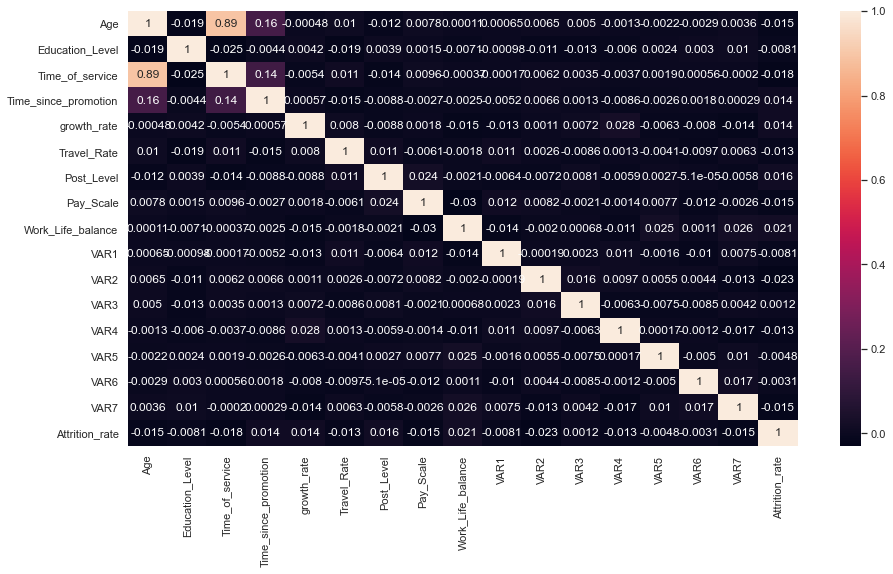

In [128]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(),annot=True)

In [129]:
data

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.000000,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841
1,EID_18000,M,24.000000,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670
2,EID_3891,F,58.000000,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851
3,EID_17492,F,26.000000,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,1.906367,3,7,3,0.0668
4,EID_22534,F,31.000000,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,EID_22547,F,32.000000,3,Single,Franklin,Sales,Directive,3.0,3,...,type2,2.0,1,-0.1048,0.7075,1.000000,4,7,4,NaN
9996,EID_10066,F,39.694007,2,Single,Franklin,Marketing,Conceptual,10.0,2,...,type2,1.0,3,0.7516,0.7075,3.000000,4,8,3,NaN
9997,EID_7126,F,60.000000,4,Single,Lebanon,Logistics,Analytical,35.0,1,...,type3,3.0,3,-1.8176,-0.4537,1.907749,4,8,4,NaN
9998,EID_4929,F,51.000000,1,Married,Springfield,IT,Behavioral,23.0,1,...,type3,1.0,5,0.7516,-0.4537,2.000000,3,9,2,NaN


In [130]:
data.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [131]:
data.shape

(10000, 24)

In [132]:
data = data.reset_index(drop=True)

In [133]:
cat_col = data.select_dtypes(exclude=np.number).drop(columns ='Employee_ID').columns

In [134]:
cat_col

Index(['Gender', 'Relationship_Status', 'Hometown', 'Unit',
       'Decision_skill_possess', 'Compensation_and_Benefits'],
      dtype='object')

In [135]:
cat_col_tranform = pd.get_dummies(data[cat_col])

In [136]:
num_col = data.select_dtypes(include=np.number).columns

In [137]:
data_preprocessed_cat_num = pd.concat([data['Employee_ID'],cat_col_tranform, data[num_col]], axis = 1)

In [138]:
data_preprocessed_cat_num

,Employee_ID,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,...,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,1,0,1,0,0,1,0,0,0,...,7.0,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841
1,EID_18000,0,1,0,1,0,0,0,1,0,...,6.0,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670
2,EID_3891,1,0,1,0,1,0,0,0,0,...,8.0,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851
3,EID_17492,1,0,0,1,0,0,1,0,0,...,8.0,1.0,3,-1.8176,-0.4537,1.906367,3,7,3,0.0668
4,EID_22534,1,0,1,0,0,0,0,1,0,...,2.0,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,EID_22547,1,0,0,1,0,1,0,0,0,...,6.0,2.0,1,-0.1048,0.7075,1.000000,4,7,4,NaN
9996,EID_10066,1,0,0,1,0,1,0,0,0,...,9.0,1.0,3,0.7516,0.7075,3.000000,4,8,3,NaN
9997,EID_7126,1,0,0,1,0,0,1,0,0,...,9.0,3.0,3,-1.8176,-0.4537,1.907749,4,8,4,NaN
9998,EID_4929,1,0,1,0,0,0,0,1,0,...,6.0,1.0,5,0.7516,-0.4537,2.000000,3,9,2,NaN


In [139]:
data_preprocessed_cat_num.dropna(subset=["Attrition_rate"]).shape

(7000, 48)

In [140]:
data_preprocessed_cat_num[data_preprocessed_cat_num["Attrition_rate"].isna()].shape

(3000, 48)

In [141]:
train_preprocessd = data_preprocessed_cat_num.dropna(subset=["Attrition_rate"])

In [142]:
test_preprocessd = data_preprocessed_cat_num[data_preprocessed_cat_num["Attrition_rate"].isna()]

In [143]:
test_preprocessd = test_preprocessd.drop(columns="Attrition_rate")

In [144]:
train_preprocessd

,Employee_ID,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,...,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,1,0,1,0,0,1,0,0,0,...,7.0,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841
1,EID_18000,0,1,0,1,0,0,0,1,0,...,6.0,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670
2,EID_3891,1,0,1,0,1,0,0,0,0,...,8.0,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851
3,EID_17492,1,0,0,1,0,0,1,0,0,...,8.0,1.0,3,-1.8176,-0.4537,1.906367,3,7,3,0.0668
4,EID_22534,1,0,1,0,0,0,0,1,0,...,2.0,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,1,0,1,0,0,1,0,0,0,...,6.0,3.0,1,0.7516,-0.4537,2.000000,3,7,3,0.7839
6996,EID_8387,1,0,1,0,0,0,1,0,0,...,4.0,3.0,2,-0.1048,-2.7762,2.000000,4,8,4,0.1055
6997,EID_8077,1,0,0,1,0,0,0,1,0,...,3.0,4.0,2,-0.1048,-0.4537,2.000000,4,8,3,0.7847
6998,EID_19597,1,0,1,0,0,0,0,0,1,...,8.0,2.0,4,0.7516,1.8688,2.000000,3,6,3,0.4162


In [145]:
test_preprocessd

,Employee_ID,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,...,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
7000,EID_22713,1,0,0,1,0,0,0,1,0,...,5,4.0,1.0,3,-0.9612,-0.4537,2.000000,1,8,4
7001,EID_9658,0,1,0,1,0,0,1,0,0,...,1,1.0,1.0,4,-0.9612,0.7075,1.000000,2,8,2
7002,EID_22203,0,1,1,0,0,0,0,1,0,...,1,8.0,1.0,4,-0.1048,0.7075,2.000000,1,9,3
7003,EID_7652,0,1,0,1,0,0,0,0,1,...,1,2.0,4.0,3,-0.1048,0.7075,2.000000,2,8,3
7004,EID_6516,1,0,1,0,0,1,0,0,0,...,3,2.0,4.0,4,1.6081,0.7075,2.000000,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,EID_22547,1,0,0,1,0,1,0,0,0,...,3,6.0,2.0,1,-0.1048,0.7075,1.000000,4,7,4
9996,EID_10066,1,0,0,1,0,1,0,0,0,...,4,9.0,1.0,3,0.7516,0.7075,3.000000,4,8,3
9997,EID_7126,1,0,0,1,0,0,1,0,0,...,2,9.0,3.0,3,-1.8176,-0.4537,1.907749,4,8,4
9998,EID_4929,1,0,1,0,0,0,0,1,0,...,2,6.0,1.0,5,0.7516,-0.4537,2.000000,3,9,2


In [146]:
train_preprocessd.to_csv("train_preprocessed.csv", index = False)

In [147]:
test_preprocessd.to_csv("test_preprocessed.csv", index = False)

In [148]:
train

,Employee_ID,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,...,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,1,0,1,0,0,1,0,0,0,...,7.0,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841
1,EID_18000,0,1,0,1,0,0,0,1,0,...,6.0,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670
2,EID_3891,1,0,1,0,1,0,0,0,0,...,8.0,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851
3,EID_17492,1,0,0,1,0,0,1,0,0,...,8.0,1.0,3,-1.8176,-0.4537,1.906367,3,7,3,0.0668
4,EID_22534,1,0,1,0,0,0,0,1,0,...,2.0,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,1,0,1,0,0,1,0,0,0,...,6.0,3.0,1,0.7516,-0.4537,2.000000,3,7,3,0.7839
6996,EID_8387,1,0,1,0,0,0,1,0,0,...,4.0,3.0,2,-0.1048,-2.7762,2.000000,4,8,4,0.1055
6997,EID_8077,1,0,0,1,0,0,0,1,0,...,3.0,4.0,2,-0.1048,-0.4537,2.000000,4,8,3,0.7847
6998,EID_19597,1,0,1,0,0,0,0,0,1,...,8.0,2.0,4,0.7516,1.8688,2.000000,3,6,3,0.4162


In [149]:
train["Age"].isna().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
6995    False
6996    False
6997    False
6998    False
6999    False
Name: Age, Length: 7000, dtype: bool>

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [151]:
train = pd.read_csv("train_preprocessed.csv")

In [1]:
test = pd.read_csv("test_preprocessed.csv")

NameError: name 'pd' is not defined

In [153]:
sample = pd.read_csv("/Users/girishelangovan/Documents/inceptez_batch_16/Dataset/employee_attrition/Dataset/sample_submission.csv")

In [154]:
sample.sum

<bound method DataFrame.sum of   Employee_ID  Attrition_rate
0       TID_1          0.1588
1       TID_2          0.1424
2       TID_3          0.4758
3       TID_4          0.0846
4       TID_5          0.2388>

In [155]:
train.columns

Index(['Employee_ID', 'Gender_F', 'Gender_M', 'Relationship_Status_Married',
       'Relationship_Status_Single', 'Hometown_Clinton', 'Hometown_Franklin',
       'Hometown_Lebanon', 'Hometown_Springfield', 'Hometown_Washington',
       'Unit_Accounting and Finance', 'Unit_Human Resource Management',
       'Unit_IT', 'Unit_Logistics', 'Unit_Marketing', 'Unit_Operarions',
       'Unit_Production', 'Unit_Purchasing', 'Unit_Quality', 'Unit_R&D',
       'Unit_Sales', 'Unit_Security', 'Decision_skill_possess_Analytical',
       'Decision_skill_possess_Behavioral',
       'Decision_skill_possess_Conceptual', 'Decision_skill_possess_Directive',
       'Compensation_and_Benefits_type0', 'Compensation_and_Benefits_type1',
       'Compensation_and_Benefits_type2', 'Compensation_and_Benefits_type3',
       'Compensation_and_Benefits_type4', 'Age', 'Education_Level',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Work_Life_balance

In [156]:
train[train.isna()].sum

<bound method DataFrame.sum of      Employee_ID  Gender_F  Gender_M  Relationship_Status_Married  \
0            NaN       NaN       NaN                          NaN   
1            NaN       NaN       NaN                          NaN   
2            NaN       NaN       NaN                          NaN   
3            NaN       NaN       NaN                          NaN   
4            NaN       NaN       NaN                          NaN   
...          ...       ...       ...                          ...   
6995         NaN       NaN       NaN                          NaN   
6996         NaN       NaN       NaN                          NaN   
6997         NaN       NaN       NaN                          NaN   
6998         NaN       NaN       NaN                          NaN   
6999         NaN       NaN       NaN                          NaN   

      Relationship_Status_Single  Hometown_Clinton  Hometown_Franklin  \
0                            NaN               NaN                N

In [157]:
train

,Employee_ID,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,...,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,1,0,1,0,0,1,0,0,0,...,7.0,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841
1,EID_18000,0,1,0,1,0,0,0,1,0,...,6.0,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670
2,EID_3891,1,0,1,0,1,0,0,0,0,...,8.0,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851
3,EID_17492,1,0,0,1,0,0,1,0,0,...,8.0,1.0,3,-1.8176,-0.4537,1.906367,3,7,3,0.0668
4,EID_22534,1,0,1,0,0,0,0,1,0,...,2.0,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,1,0,1,0,0,1,0,0,0,...,6.0,3.0,1,0.7516,-0.4537,2.000000,3,7,3,0.7839
6996,EID_8387,1,0,1,0,0,0,1,0,0,...,4.0,3.0,2,-0.1048,-2.7762,2.000000,4,8,4,0.1055
6997,EID_8077,1,0,0,1,0,0,0,1,0,...,3.0,4.0,2,-0.1048,-0.4537,2.000000,4,8,3,0.7847
6998,EID_19597,1,0,1,0,0,0,0,0,1,...,8.0,2.0,4,0.7516,1.8688,2.000000,3,6,3,0.4162


In [158]:
X = train.drop(columns=["Employee_ID","Attrition_rate"])

In [159]:
y = train["Attrition_rate"]

In [160]:
model = LinearRegression()

In [161]:
model.fit(X,y)

LinearRegression()

In [162]:
mean_squared_error(y, model.predict(X),squared=False)

0.18504402875464174

In [163]:
X_test = test_preprocessd.drop(columns=["Employee_ID"],axis=True)

In [164]:
X_test

,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,...,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
7000,1,0,0,1,0,0,0,1,0,0,...,5,4.0,1.0,3,-0.9612,-0.4537,2.000000,1,8,4
7001,0,1,0,1,0,0,1,0,0,0,...,1,1.0,1.0,4,-0.9612,0.7075,1.000000,2,8,2
7002,0,1,1,0,0,0,0,1,0,0,...,1,8.0,1.0,4,-0.1048,0.7075,2.000000,1,9,3
7003,0,1,0,1,0,0,0,0,1,0,...,1,2.0,4.0,3,-0.1048,0.7075,2.000000,2,8,3
7004,1,0,1,0,0,1,0,0,0,0,...,3,2.0,4.0,4,1.6081,0.7075,2.000000,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,1,0,1,0,0,0,0,...,3,6.0,2.0,1,-0.1048,0.7075,1.000000,4,7,4
9996,1,0,0,1,0,1,0,0,0,0,...,4,9.0,1.0,3,0.7516,0.7075,3.000000,4,8,3
9997,1,0,0,1,0,0,1,0,0,0,...,2,9.0,3.0,3,-1.8176,-0.4537,1.907749,4,8,4
9998,1,0,1,0,0,0,0,1,0,0,...,2,6.0,1.0,5,0.7516,-0.4537,2.000000,3,9,2


In [165]:
X_test[X_test.isna()]

,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,...,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
X_test.dropna

<bound method DataFrame.dropna of       Gender_F  Gender_M  Relationship_Status_Married  \
7000         1         0                            0   
7001         0         1                            0   
7002         0         1                            1   
7003         0         1                            0   
7004         1         0                            1   
...        ...       ...                          ...   
9995         1         0                            0   
9996         1         0                            0   
9997         1         0                            0   
9998         1         0                            1   
9999         1         0                            0   

      Relationship_Status_Single  Hometown_Clinton  Hometown_Franklin  \
7000                           1                 0                  0   
7001                           1                 0                  0   
7002                           0                 0            

In [167]:
data

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.000000,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841
1,EID_18000,M,24.000000,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670
2,EID_3891,F,58.000000,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851
3,EID_17492,F,26.000000,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,1.906367,3,7,3,0.0668
4,EID_22534,F,31.000000,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,EID_22547,F,32.000000,3,Single,Franklin,Sales,Directive,3.0,3,...,type2,2.0,1,-0.1048,0.7075,1.000000,4,7,4,NaN
9996,EID_10066,F,39.694007,2,Single,Franklin,Marketing,Conceptual,10.0,2,...,type2,1.0,3,0.7516,0.7075,3.000000,4,8,3,NaN
9997,EID_7126,F,60.000000,4,Single,Lebanon,Logistics,Analytical,35.0,1,...,type3,3.0,3,-1.8176,-0.4537,1.907749,4,8,4,NaN
9998,EID_4929,F,51.000000,1,Married,Springfield,IT,Behavioral,23.0,1,...,type3,1.0,5,0.7516,-0.4537,2.000000,3,9,2,NaN


In [168]:
test_X = test.drop(columns="Employee_ID")

In [169]:
test_pred=model.predict(test_X)

In [170]:
test_pred

array([0.21421051, 0.19624329, 0.18969727, ..., 0.16802979, 0.15072632,
       0.19747162])

In [171]:
test_pred.shape

(3000,)

In [172]:
res = pd.DataFrame(test_pred)

res.columns = ["Attrition_rate"]

In [173]:
test[['Attrition_rate']] = test_pred

In [174]:
test

,Employee_ID,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,...,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_22713,1,0,0,1,0,0,0,1,0,...,4.0,1.0,3,-0.9612,-0.4537,2.000000,1,8,4,0.214211
1,EID_9658,0,1,0,1,0,0,1,0,0,...,1.0,1.0,4,-0.9612,0.7075,1.000000,2,8,2,0.196243
2,EID_22203,0,1,1,0,0,0,0,1,0,...,8.0,1.0,4,-0.1048,0.7075,2.000000,1,9,3,0.189697
3,EID_7652,0,1,0,1,0,0,0,0,1,...,2.0,4.0,3,-0.1048,0.7075,2.000000,2,8,3,0.238373
4,EID_6516,1,0,1,0,0,1,0,0,0,...,2.0,4.0,4,1.6081,0.7075,2.000000,2,7,4,0.201973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,EID_22547,1,0,0,1,0,1,0,0,0,...,6.0,2.0,1,-0.1048,0.7075,1.000000,4,7,4,0.200745
2996,EID_10066,1,0,0,1,0,1,0,0,0,...,9.0,1.0,3,0.7516,0.7075,3.000000,4,8,3,0.182701
2997,EID_7126,1,0,0,1,0,0,1,0,0,...,9.0,3.0,3,-1.8176,-0.4537,1.907749,4,8,4,0.168030
2998,EID_4929,1,0,1,0,0,0,0,1,0,...,6.0,1.0,5,0.7516,-0.4537,2.000000,3,9,2,0.150726


In [175]:
df = test[["Employee_ID", "Attrition_rate"]]

In [678]:
df

,Employee_ID,Attrition_rate
0,EID_22713,0.214211
1,EID_9658,0.196243
2,EID_22203,0.189697
3,EID_7652,0.238373
4,EID_6516,0.201973
...,...,...
2995,EID_22547,0.200745
2996,EID_10066,0.182701
2997,EID_7126,0.168030
2998,EID_4929,0.150726


In [681]:
df.to_csv("/Users/girishelangovan/Documents/inceptez_batch_16/Dataset/employee_attrition/employee_attrition_res.csv",index = False)

In [686]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [689]:
model2 = LogisticRegression()

In [691]:
model2.fit(X,y)

ValueError: Unknown label type: 'continuous'

In [692]:
pip install imbalanced-learn

     |████████████████████████████████| 206 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 4.5 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
import imblearn

In [3]:
from imblearn.under_sampling import NearMiss

In [4]:
nm = NearMiss()

In [5]:
trans = MinMaxScaler()

In [176]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state=9)

In [177]:
def model_fit(model, train_X, train_y, test_X):
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    print("Train Accuracy : ",accuracy_score(train_y, train_pred))
    print("Train confusion matrix : \n",confusion_matrix(train_y, train_pred))
    print("Train AUC : ", roc_auc_score(train_y, train_pred))
    test_pred = model.predict(test_X)
    print("Test Accuracy : ",accuracy_score(test_y, test_pred))
    print("Test confusion matrix : \n",confusion_matrix(test_y, test_pred))
    print("Test AUC : ", roc_auc_score(test_y, test_pred))
    skplt.metrics.plot_roc_curve(test_y, model.predict_proba(test_X))
    return roc_auc_score(train_y, train_pred), roc_auc_score(test_y, test_pred)
       

In [183]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[1673  617  780 ... 3174 2652  832]
continuous
binary
multiclass


In [185]:
logistic_model = LogisticRegression()

In [187]:
logistic_model.fit(X,training_scores_encoded)

/Users/girishelangovan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [188]:
logistic_model.coef_

array([[-0.04137902,  0.07798638,  0.09778765, ...,  0.03736447,
         0.49374331, -0.07289114],
       [ 0.04588497, -0.04202223,  0.01282805, ..., -0.43863164,
        -0.02958465,  0.40722138],
       [ 0.24751708, -0.21501189,  0.21812053, ..., -0.1784843 ,
         0.68046247, -0.39349601],
       ...,
       [ 0.07357998, -0.08111669, -0.12802726, ...,  0.00835863,
         0.1165578 , -0.07468188],
       [ 0.05943178, -0.09343288, -0.14445584, ..., -0.24831946,
        -0.24907087,  0.21794523],
       [ 0.05243605, -0.09735554, -0.15186968, ..., -0.46646158,
        -0.51049267, -0.00332999]])

<AxesSubplot:>

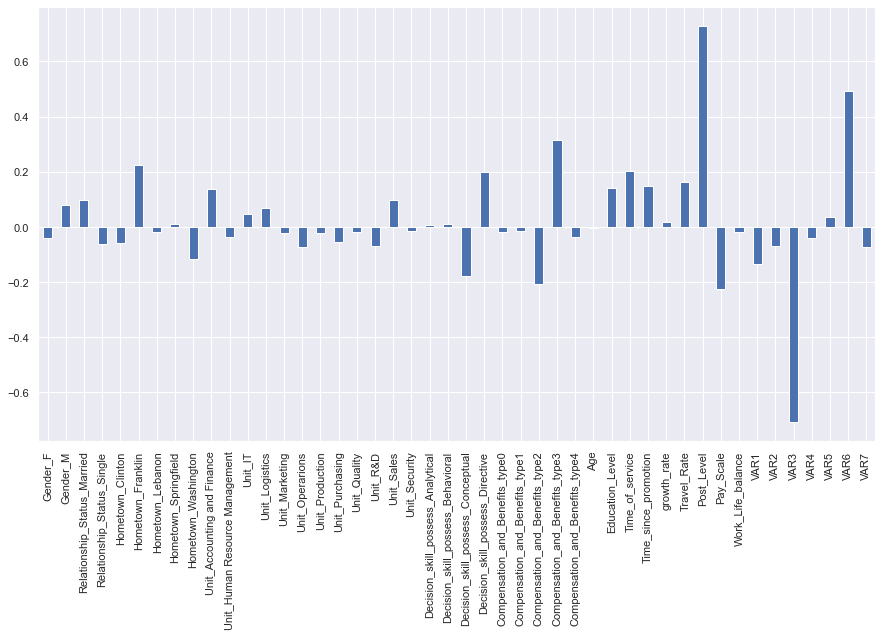

In [189]:
pd.Series(data = logistic_model.coef_[0],index=X.columns).plot(kind = "bar")

In [190]:
accuracy_score(training_scores_encoded, logistic_model.predict(X))

0.16042857142857142

In [191]:
confusion_matrix(training_scores_encoded, logistic_model.predict(X))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])